In [1]:
pip install scikit-optimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from skopt import BayesSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing as skp

path = '/content/drive/MyDrive/AA/Data/features_3_sec.csv'
dataset = pd.read_csv(path)

In [18]:
dataset.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [19]:
print(dataset.columns.tolist())

['filename', 'length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean', 'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var', 'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean', 'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var', 'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo', 'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean', 'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var', 'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean', 'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var', 'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean', 'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var', 'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean', 'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var', 'label']


In [20]:


data = dataset.iloc[0:, 1:]
y = data['label']
X = data.loc[:, data.columns != 'label']

# normalize
cols = X.columns
min_max_scaler = skp.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(np_scaled, columns = cols)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7)

In [21]:
def mod_fit(estimator,params, X_train, X_test, y_train, y_test,name):
  gs_gbs = BayesSearchCV(estimator = estimator,
                        search_spaces = params,
                        cv = 4,
                        n_iter = 30,
                        random_state = 7,
                        n_jobs = -1,
                        refit = True
                        )
  
  #Ajustamos el modelo, predecimos y evaluamos

  gs_gbs.fit(X_train,y_train)
  y_pred = gs_gbs.predict(X_test)

  print(classification_report(y_test,y_pred))
  print('-'*30)
  print(f'Accuracy of {name} : {accuracy_score(y_test,y_pred)}')
  print(gs_gbs.best_params_)


In [22]:


#Instanciamos todos los modelos que vamos a emplear
dtc = DecisionTreeClassifier(random_state = 7)
lr = LogisticRegression(random_state = 7, multi_class='multinomial')
knn = KNeighborsClassifier(n_neighbors=3)
rf = RandomForestClassifier(random_state = 7)
gbc = GradientBoostingClassifier(random_state = 7)
xgb_model = xgb.XGBClassifier()




In [23]:
params_dtc = {'max_depth' : (1,100),
              'criterion' : ['gini','entropy'],
              'splitter'  : ['best'],
              'min_samples_split' : (2,5) ,
              'min_samples_leaf' : (2,5),
              'min_impurity_decrease': (0.0,0.1)
              }




#Evaluamos con cada algoritmo
print("Decision Tree Classifier")
mod_fit(dtc,params_dtc, X_train, X_test, y_train, y_test, 'Decision Tree Classifier')
print("----------------------------------------------------------------------------")


Decision Tree Classifier


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


              precision    recall  f1-score   support

       blues       0.58      0.64      0.61       183
   classical       0.91      0.83      0.87       190
     country       0.53      0.52      0.53       208
       disco       0.62      0.56      0.59       215
      hiphop       0.66      0.66      0.66       200
        jazz       0.66      0.76      0.71       199
       metal       0.81      0.75      0.78       228
         pop       0.68      0.72      0.70       184
      reggae       0.67      0.66      0.66       195
        rock       0.58      0.59      0.59       196

    accuracy                           0.67      1998
   macro avg       0.67      0.67      0.67      1998
weighted avg       0.67      0.67      0.67      1998

------------------------------
Accuracy of Decision Tree Classifier : 0.6681681681681682
OrderedDict([('criterion', 'entropy'), ('max_depth', 100), ('min_impurity_decrease', 0.0), ('min_samples_leaf', 3), ('min_samples_split', 5), ('splitter

In [24]:
params_lr = {
    'penalty' : ['l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'saga', 'sag'],   
}

print("Logistic Regression")
mod_fit(lr,params_lr, X_train, X_test, y_train, y_test, 'Logistic Regression')
print("----------------------------------------------------------------------------")




Logistic Regression


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist

              precision    recall  f1-score   support

       blues       0.65      0.68      0.66       183
   classical       0.93      0.94      0.93       190
     country       0.68      0.64      0.66       208
       disco       0.69      0.66      0.68       215
      hiphop       0.68      0.62      0.65       200
        jazz       0.81      0.81      0.81       199
       metal       0.85      0.82      0.84       228
         pop       0.72      0.76      0.74       184
      reggae       0.62      0.64      0.63       195
        rock       0.51      0.56      0.54       196

    accuracy                           0.71      1998
   macro avg       0.71      0.71      0.71      1998
weighted avg       0.71      0.71      0.71      1998

------------------------------
Accuracy of Logistic Regression : 0.7127127127127127
OrderedDict([('C', 100.0), ('penalty', 'l2'), ('solver', 'newton-cg')])
----------------------------------------------------------------------------


In [25]:
params_knn = {
   'n_neighbors': (5,15),
   'algorithm' : ['auto'],
   'n_jobs' : [-1]
}

print("K-Neighbors Classification")
mod_fit(knn,params_knn, X_train, X_test, y_train, y_test, 'K-Neighbors Classifier')
print("----------------------------------------------------------------------------")

K-Neighbors Classification


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist

              precision    recall  f1-score   support

       blues       0.88      0.91      0.89       183
   classical       0.90      0.98      0.94       190
     country       0.81      0.88      0.84       208
       disco       0.89      0.94      0.91       215
      hiphop       0.93      0.90      0.91       200
        jazz       0.91      0.85      0.88       199
       metal       0.98      0.93      0.95       228
         pop       0.96      0.89      0.92       184
      reggae       0.87      0.90      0.89       195
        rock       0.88      0.81      0.84       196

    accuracy                           0.90      1998
   macro avg       0.90      0.90      0.90      1998
weighted avg       0.90      0.90      0.90      1998

------------------------------
Accuracy of K-Neighbors Classifier : 0.8978978978978979
OrderedDict([('algorithm', 'auto'), ('n_jobs', -1), ('n_neighbors', 5)])
----------------------------------------------------------------------------


In [27]:
params_rf = {
   'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

print("Random Forest  Classification")
mod_fit(rf,params_rf, X_train, X_test, y_train, y_test, 'Random Forest Classifier')
print("----------------------------------------------------------------------------")

Random Forest  Classification


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


              precision    recall  f1-score   support

       blues       0.75      0.85      0.80       183
   classical       0.89      0.97      0.93       190
     country       0.72      0.68      0.70       208
       disco       0.73      0.67      0.69       215
      hiphop       0.80      0.69      0.74       200
        jazz       0.79      0.88      0.84       199
       metal       0.84      0.90      0.87       228
         pop       0.77      0.80      0.78       184
      reggae       0.68      0.81      0.74       195
        rock       0.72      0.47      0.57       196

    accuracy                           0.77      1998
   macro avg       0.77      0.77      0.77      1998
weighted avg       0.77      0.77      0.77      1998

------------------------------
Accuracy of Random Forest Classifier : 0.7712712712712713
OrderedDict([('criterion', 'entropy'), ('max_depth', 8), ('max_features', 'sqrt'), ('n_estimators', 462)])
---------------------------------------------

In [26]:
params_gbc = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 12),
    "min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "squared_error"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":[10]
}

print("GBC  Classification")
mod_fit(gbc,params_gbc, X_train, X_test, y_train, y_test, 'GBC Classifier')
print("----------------------------------------------------------------------------")

GBC  Classification


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


              precision    recall  f1-score   support

       blues       0.48      0.54      0.51       183
   classical       0.70      0.86      0.77       190
     country       0.55      0.45      0.50       208
       disco       0.59      0.47      0.52       215
      hiphop       0.58      0.45      0.51       200
        jazz       0.54      0.56      0.55       199
       metal       0.69      0.79      0.74       228
         pop       0.50      0.71      0.59       184
      reggae       0.49      0.57      0.53       195
        rock       0.33      0.17      0.23       196

    accuracy                           0.56      1998
   macro avg       0.54      0.56      0.54      1998
weighted avg       0.55      0.56      0.55      1998

------------------------------
Accuracy of GBC Classifier : 0.5585585585585585
OrderedDict([('criterion', 'squared_error'), ('learning_rate', 0.2), ('loss', 'deviance'), ('max_depth', 5), ('max_features', 'sqrt'), ('min_samples_leaf', 0.1363

In [28]:

params_xgb = {    
    'learning_rate': [0.05,0.1],
    'n_stimators' : [100,200]
}

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)


print("XGB  Classification")
mod_fit(xgb_model,params_xgb, X_train, X_test, y_train, y_test, 'xgb Classifier')
print("----------------------------------------------------------------------------")

XGB  Classification


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


[22:40:41] WARNING: ../src/learner.cc:767: 
Parameters: { "n_stimators" } are not used.

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       183
           1       0.93      0.98      0.95       190
           2       0.78      0.88      0.83       208
           3       0.86      0.85      0.86       215
           4       0.89      0.86      0.88       200
           5       0.90      0.89      0.90       199
           6       0.94      0.90      0.92       228
           7       0.91      0.84      0.87       184
           8       0.89      0.85      0.87       195
           9       0.75      0.76      0.76       196

    accuracy                           0.87      1998
   macro avg       0.87      0.87      0.87      1998
weighted avg       0.87      0.87      0.87      1998

------------------------------
Accuracy of xgb Classifier : 0.8713713713713713
OrderedDict([('learning_rate', 0.09550460472284485), ('n_stimators', 100)

In [32]:

df = pd.read_csv('/content/drive/MyDrive/AA/Data/features_30_sec.csv')
df.head()




,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


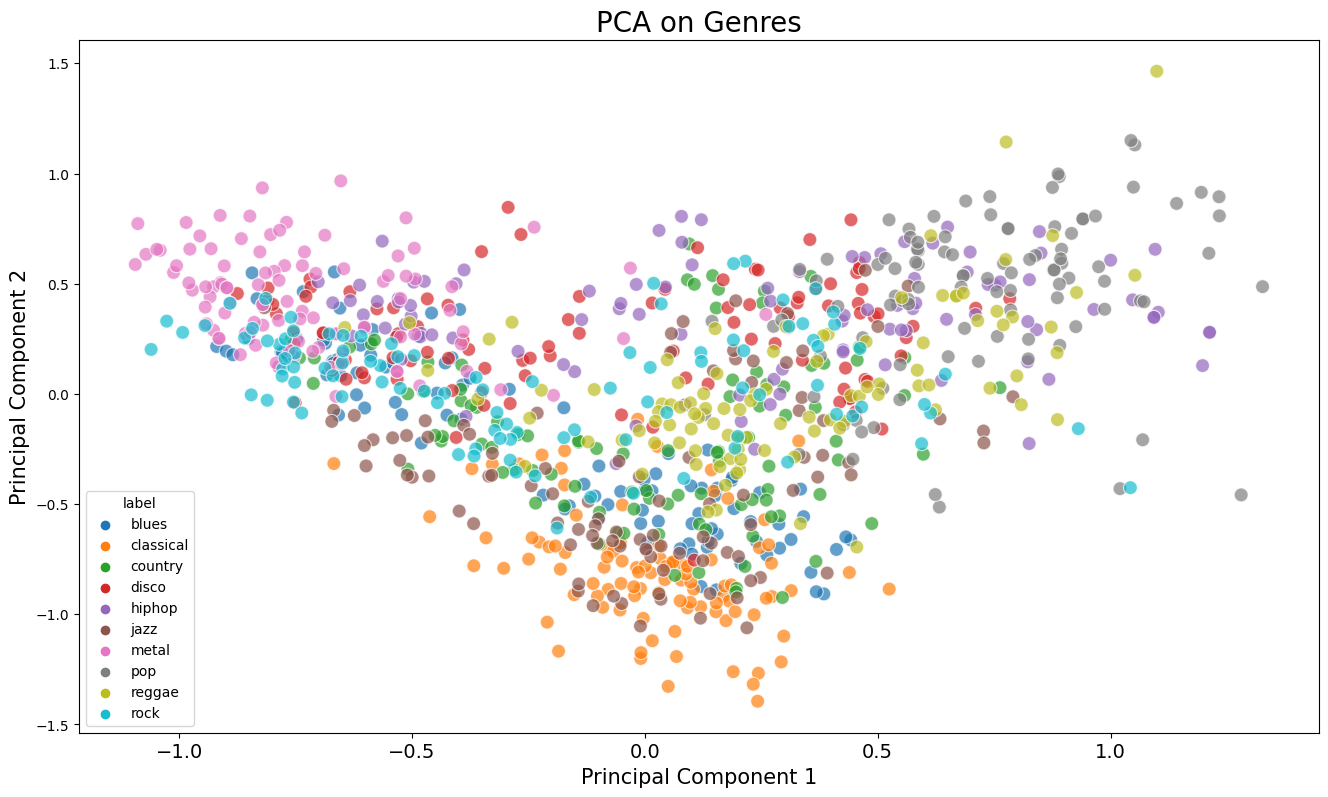

In [33]:
data = df.iloc[0:, 1:]
y = data['label']
X = data.loc[:, data.columns != 'label']

# normalize
cols = X.columns
min_max_scaler = skp.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(np_scaled, columns = cols)

# Top 2 pca components
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])

# concatenate with target label
finalDf = pd.concat([principalDf, y], axis = 1)

plt.figure(figsize = (16, 9))


sns.scatterplot(x = "pc1", y = "pc2", data = finalDf, hue = "label", alpha = 0.7, s = 100);


plt.title('PCA on Genres', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Principal Component 1", fontsize = 15)
plt.ylabel("Principal Component 2", fontsize = 15)
plt.savefig("PCA_Scattert.png")

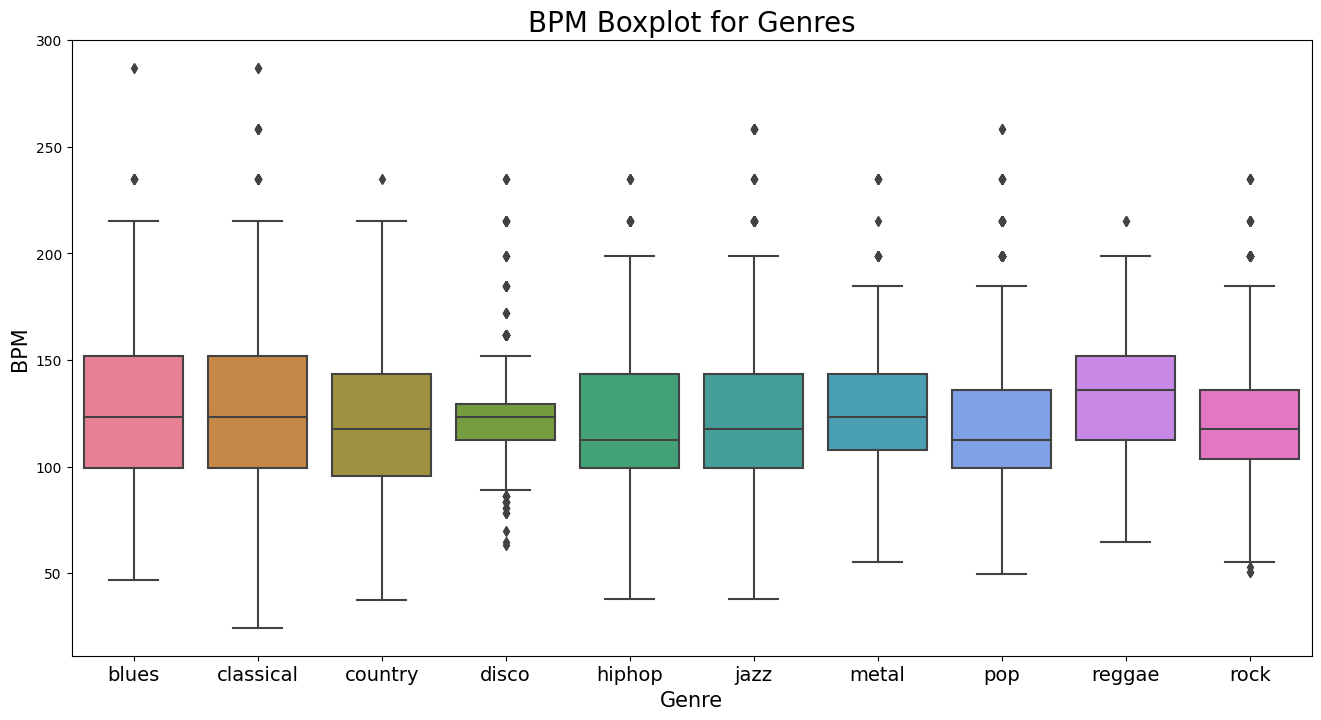

In [31]:
x = df[["label", "tempo"]]

fig, ax = plt.subplots(figsize=(16, 8));
sns.boxplot(x = "label", y = "tempo", data = x, palette = 'husl');

plt.title('BPM Boxplot for Genres', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("BPM", fontsize = 15)
plt.savefig("BPM_Boxplot.png")
